<a href="https://colab.research.google.com/github/sandhrabijoy/Time-series/blob/main/Timeseries_using_multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

In [2]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('/content/jena_climate_2009_2016.csv')

In [5]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173963,22.04.2012 02:20:00,977.09,6.50,281.52,4.77,88.7,9.69,8.59,1.09,5.49,8.79,1213.08,2.14,3.08,209.7
173964,22.04.2012 02:30:00,977.13,6.48,281.50,4.79,88.9,9.67,8.60,1.07,5.49,8.80,1213.21,1.75,2.52,202.4
173965,22.04.2012 02:40:00,977.19,6.54,281.55,4.70,88.0,9.72,8.55,1.17,5.46,8.75,1213.04,1.33,2.80,218.6
173966,22.04.2012 02:50:00,977.24,6.65,281.65,4.64,87.0,9.79,8.51,1.27,5.44,8.71,1212.66,1.33,2.80,182.2


In [6]:
df=df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173939,21.04.2012 22:20:00,976.00,6.46,281.57,4.29,86.0,9.66,8.31,1.35,5.31,8.51,1212.04,2.48,3.76,217.0
173945,21.04.2012 23:20:00,976.14,7.26,282.36,4.26,81.2,10.21,8.29,1.92,5.30,8.49,1208.75,2.54,3.36,190.6
173951,22.04.2012 00:20:00,976.47,7.79,282.87,4.41,79.1,10.59,8.37,2.21,5.35,8.57,1206.84,2.74,4.57,193.1
173957,22.04.2012 01:20:00,976.73,7.20,282.25,4.89,85.2,10.17,8.66,1.50,5.53,8.87,1209.56,3.75,6.01,200.7


In [7]:
df.index= pd.to_datetime(df['Date Time'],format='%d.%m.%Y %H:%M:%S')

In [8]:
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


<Axes: xlabel='Date Time'>

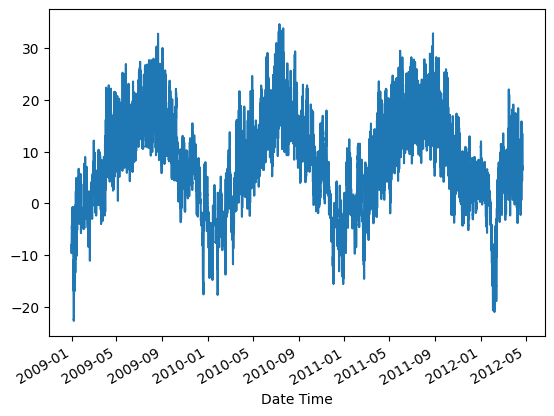

In [9]:
temp=df['T (degC)']
temp.plot()

In [10]:
def df_to_X_y(df,window_size=5):

  df_as_np=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_as_np)-window_size):
    row=[[a]for a in df_as_np[i:i+5]]
    X.append(row)
    label=df_as_np[i+5]
    y.append(label)
  return np.array(X),np.array(y)

In [11]:
WINDOW_SIZE=5
X,y=df_to_X_y(temp,WINDOW_SIZE)
X.shape,y.shape

((28989, 5, 1), (28989,))

In [12]:
X_train,y_train=X[:60000],y[:60000]
X_val,y_val=X[60000:65000],y[60000:65000]
X_test,y_test=X[65000:],y[65000:]
X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_test.shape,y_val.shape

((28989, 5, 1), (0, 5, 1), (0, 5, 1), (28989,), (0,), (0,))

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1=Sequential()
model1.add(LSTM(64, input_shape=(5, 1)))
model1.add(Dense(1))

model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
cp = ModelCheckpoint('model1/model1_checkpoint.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [15]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])


Epoch 1/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 94.9030 - root_mean_squared_error: 9.6600
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


906/906 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 18.2527 - root_mean_squared_error: 4.2661
Epoch 3/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 9.3040 - root_mean_squared_error: 3.0475
Epoch 4/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.1496 - root_mean_squared_error: 2.2683
Epoch 5/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.1736 - root_mean_squared_error: 1.7795
Epoch 6/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.0256 - root_mean_squared_error: 1.4217
Epoch 7/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.3588 - root_mean_squared_error: 1.1654
Epoch 8/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.0593 - root_mean_squared_error: 1.0291
Epoch 9/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.9004 - root_mean_squared_error: 0.9488
Epoch 10/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8190 - root_mean_squared_error: 0.9046


MULTIVARIATE


In [20]:
model2=Sequential()
model2.add(Conv1D(64, input_shape=(5, 1),kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8,'relu'))
model2.add(Dense(1,'linear'))

model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 4, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257 (8.82 KB)

 Trainable params: 2,257 (8.82 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
cp2 = ModelCheckpoint('model2/model2_checkpoint.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [23]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6897 - root_mean_squared_error: 0.8301
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6666 - root_mean_squared_error: 0.8164
Epoch 3/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6726 - root_mean_squared_error: 0.8198
Epoch 4/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6738 - root_mean_squared_error: 0.8208
Epoch 5/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6567 - root_mean_squared_error: 0.8102
Epoch 6/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6515 - root_mean_squared_error: 0.8068
Epoch 7/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6683 - root_mean_squared_error: 0.8172
Epoch 8/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6586 - root_mean_squared_error: 0.8114
Epoch 9/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6600 - root_mean_squared_error: 0.8123
Epoch 10/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6786 - root_mean_squared_error: 0.8236


In [25]:
model3=Sequential()
model3.add(GRU(64, input_shape=(5, 1)))
model3.add(Flatten())
model3.add(Dense(8,'relu'))
model3.add(Dense(1,'linear'))

model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 4, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,773 (26.46 KB)

 Trainable params: 2,257 (8.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,516 (17.64 KB)

In [27]:
cp3 = ModelCheckpoint('model3/model3_checkpoint.keras', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [28]:
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp3])

Epoch 1/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 99.0390 - root_mean_squared_error: 9.8633
Epoch 2/10
 20/906 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 19.0068 - root_mean_squared_error: 4.3539

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


906/906 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 12.4916 - root_mean_squared_error: 3.5127
Epoch 3/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3.3383 - root_mean_squared_error: 1.8222
Epoch 4/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.4688 - root_mean_squared_error: 1.2111
Epoch 5/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.0037 - root_mean_squared_error: 1.0017
Epoch 6/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.8447 - root_mean_squared_error: 0.9190
Epoch 7/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.7598 - root_mean_squared_error: 0.8710
Epoch 8/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.7136 - root_mean_squared_error: 0.8446
Epoch 9/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.6870 - root_mean_squared_error: 0.8287
Epoch 10/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.6664 - root_mean_squared_error: 0.8162


In [61]:
tempdf=pd.DataFrame({'Temperature':temp})
tempdf['Seconds']=tempdf.index.map(pd.Timestamp.timestamp)
tempdf

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2012-04-21 22:20:00,6.46,1.335047e+09
2012-04-21 23:20:00,7.26,1.335050e+09
2012-04-22 00:20:00,7.79,1.335054e+09


In [62]:
day=60*60*24
year=365.2425*day


tempdf['Day sin']=np.sin(tempdf['Seconds']*(2*np.pi/day))
tempdf['Day cos']=np.cos(tempdf['Seconds']*(2*np.pi/day))
tempdf['Year sin']=np.sin(tempdf['Seconds']*(2*np.pi/year))
tempdf['Year cos']=np.cos(tempdf['Seconds']*(2*np.pi/year))
tempdf

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2012-04-21 22:20:00,6.46,1.335047e+09,-0.422618,0.906308,0.938844,-0.344342
2012-04-21 23:20:00,7.26,1.335050e+09,-0.173648,0.984808,0.938597,-0.345015
2012-04-22 00:20:00,7.79,1.335054e+09,0.087156,0.996195,0.938350,-0.345687


In [63]:
tempdf=tempdf.drop('Seconds',axis=1)

In [64]:
tempdf.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [65]:
def df_to_X_y2(df,window_size=6):
  df_as_np=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_as_np)-window_size):
    row=[r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label=df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X),np.array(y)


In [66]:
X2,y2=df_to_X_y2(tempdf)
X2.shape,y2.shape

((28988, 6, 5), (28988,))

In [67]:
X2_train,y2_train=X2[:20000],y2[:20000]

In [68]:
X2_val,y2_val=X2[20000:25000],y2[20000:25000]

In [69]:
X2_test,y2_test=X2[25000:],y2[25000:]

In [70]:
X2_train.shape,X2_test.shape,X2_val.shape,y2_train.shape,y2_test.shape,y2_val.shape


((20000, 6, 5), (3988, 6, 5), (5000, 6, 5), (20000,), (3988,), (5000,))

In [71]:
temp_training_mean=np.mean(X2_train[:,:,0])
temp_training_std=np.std(X2_train[:,:,0])
def preprocess(X):
  X[:,:,0]=(X[:,:,0]-temp_training_mean)/temp_training_std
  return X

In [72]:
preprocess(X2_val)
preprocess(X2_train)
preprocess(X2_test)

array([[[-0.26912176, -0.98480775, -0.17364818, -0.80573241,
          0.59227973],
        [-0.31284231, -0.9961947 ,  0.08715574, -0.80530767,
          0.59285712],
        [-0.36216807, -0.93969262,  0.34202014, -0.80488251,
          0.59343419],
        [-0.46194061, -0.81915204,  0.57357644, -0.80445694,
          0.59401097],
        [-0.44064085, -0.64278761,  0.76604444, -0.80403096,
          0.59458744],
        [-0.45745645, -0.42261826,  0.90630779, -0.80360456,
          0.5951636 ]],

       [[-0.31284231, -0.9961947 ,  0.08715574, -0.80530767,
          0.59285712],
        [-0.36216807, -0.93969262,  0.34202014, -0.80488251,
          0.59343419],
        [-0.46194061, -0.81915204,  0.57357644, -0.80445694,
          0.59401097],
        [-0.44064085, -0.64278761,  0.76604444, -0.80403096,
          0.59458744],
        [-0.45745645, -0.42261826,  0.90630779, -0.80360456,
          0.5951636 ],
        [-0.49220869, -0.17364818,  0.98480775, -0.80317775,
          0.5

In [73]:
model4=Sequential()
model4.add(InputLayer((6,5)))
model4.add(LSTM(64))
model4.add(Dense(8,'relu'))
model4.add(Dense(1,'linear'))
model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 64)                  │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,449 (72.07 KB)

 Trainable params: 18,449 (72.07 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
cp4 = ModelCheckpoint('model4/model4_checkpoint.keras', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [75]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 129.1146 - root_mean_squared_error: 11.3568 - val_loss: 116.7447 - val_root_mean_squared_error: 10.8048
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 52.7737 - root_mean_squared_error: 7.2562 - val_loss: 56.0309 - val_root_mean_squared_error: 7.4854
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 27.0803 - root_mean_squared_error: 5.1992 - val_loss: 28.5563 - val_root_mean_squared_error: 5.3438
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 14.5539 - root_mean_squared_error: 3.8129 - val_loss: 15.1492 - val_root_mean_squared_error: 3.8922
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9.1447 - root_mean_squared_error: 3.0197 - val_loss: 9.0702 - val_root_mean_squared_error: 3.0117
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 5.8508 - root_mean_squared_error: 2.4173 - val_loss: 5.9267 - val_root_mean_squared_error: 2.4345
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 

In [79]:
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

def plot_predictions1(model,X,y,start=0,end=100):
  predictions=model.predict(X).flatten()
  df=pd.DataFrame(data={'Predictions':predictions,'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df,mse(y,predictions)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(      Predictions  Actuals
 0        3.379714     3.12
 1        3.236038     2.95
 2        3.008037     2.67
 3        2.666483     2.32
 4        2.152760     1.83
 ...           ...      ...
 3983     5.124711     6.46
 3984     5.095427     7.26
 3985     6.276080     7.79
 3986     7.053232     7.20
 3987     7.452987     6.50
 
 [3988 rows x 2 columns],
 1.0708174401454786)

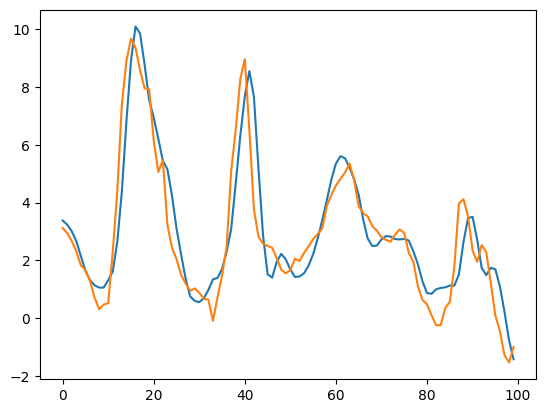

In [80]:
plot_predictions1(model4,X2_test,y2_test)

In [82]:
ptempdf=pd.concat([df['p (mbar)'],tempdf],axis=1)
ptempdf.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


In [83]:
def df_to_X_y3(df,window_size=7):
  df_as_np=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_as_np)-window_size):
    row=[r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label=[df_as_np[i+window_size][0],df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X),np.array(y)

In [84]:
X3,y3=df_to_X_y3(ptempdf)
X3.shape,y3.shape


((28987, 7, 6), (28987, 2))

In [85]:
X3_train,y3_train=X3[:20000],y3[:20000]

In [86]:
X3_test,y3_test=X3[20000:25000],y3[20000:25000]

In [88]:
X3_val,y3_val=X3[25000:],y3[25000:]

In [90]:
X3_train.shape,X3_test.shape,X3_val.shape,y3_train.shape,y3_test.shape,y3_val.shape


((20000, 7, 6), (5000, 7, 6), (3987, 7, 6), (20000, 2), (5000, 2), (3987, 2))

In [94]:
p_training_mean=np.mean(X3_train[:,:,0])
p_training_std=np.std(X3_train[:,:,0])

temp_training_mean1=np.mean(X3_train[:,:,1])
temp_training_std1=np.std(X3_train[:,:,1])

def preprocess1(X):
  X[:,:,1]=(X[:,:,1]-temp_training_mean1)/temp_training_std1
  X[:,:,0]=(X[:,:,0]-p_training_mean)/p_training_std
  return X

In [95]:
def preprocess_output(y):
  y[:,:,1]=(y[:,:,1]-temp_training_mean1)/temp_training_std1
  y[:,:,0]=(y[:,:,0]-p_training_mean)/p_training_std